#### Import Statements

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats

### Constants

In [2]:
ring_width = 768*2
ring_1_radius = 2048
delta_radius = 3072

### Math Functions

In [3]:
def triangular_number(n):
    return sum(range(1, n+1))

def ring_radius(n):
    return ring_1_radius + (n-1) * delta_radius

def arc_distance_between_strongholds(n):
    return 2*math.pi*ring_radius(n) / triangular_number(n + 1)

### Plots

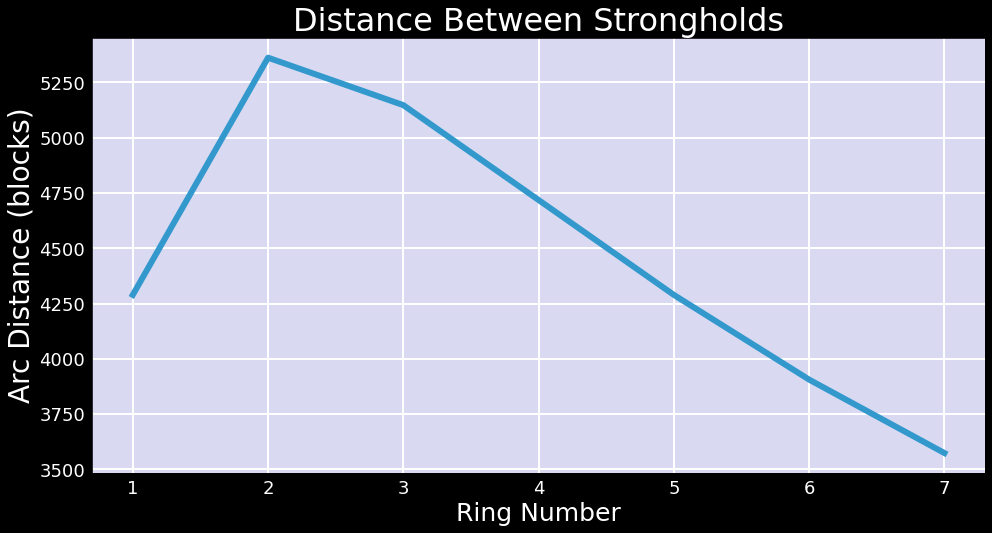

In [4]:
X = range(1, 8)
Y = [arc_distance_between_strongholds(n) for n in X]
fig = plt.figure(figsize=(16, 8))
plt.plot(X, Y, lw=6, color=(0.2, 0.6, 0.8))
plt.title("Distance Between Strongholds", fontsize=32, color=(1,1,1))
plt.xlabel("Ring Number", fontsize=25, color=(1,1,1))
plt.ylabel("Arc Distance (blocks)", fontsize=28, color=(1,1,1))

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.95))
plt.grid(color=(1, 1, 1), lw=2)
plt.xticks(fontsize=18, color=(1,1,1))
plt.yticks(fontsize=18, color=(1,1,1))
fig.patch.set_facecolor('black')

plt.show()

### Theoretical Explanation
The number of strongholds per ring is given by $$(n+1)(n+2)/2,$$ the $(n+1)$th triangular number.
The circumference of ring $n$ is given by $$2\pi(2048 + 3072(n-1)).$$

So the arc distance between strongholds is
$$\frac{2\pi(2048 + 3072(n-1))}{(n+1)(n+2)/2} = \frac{4\pi(2048 + 3072(n-1))}{(n+1)(n+2)} = 4096\pi\frac{3n - 1}{(n+1)(n+2)}.$$

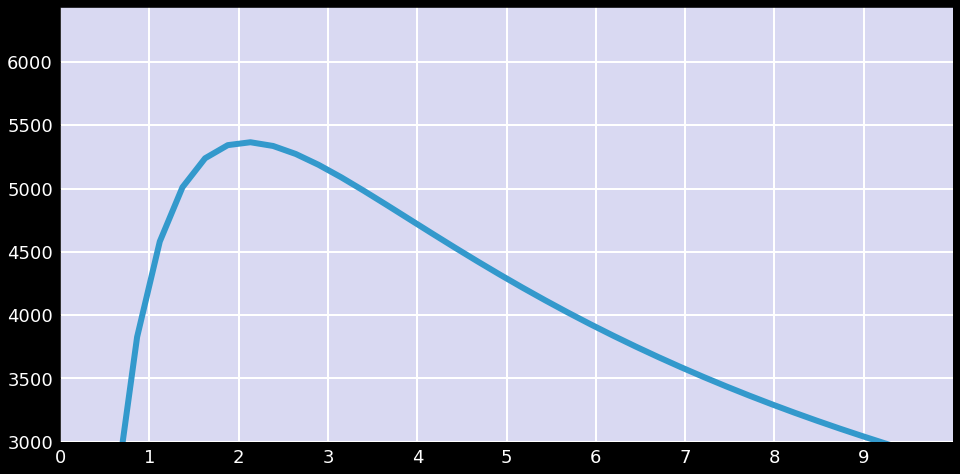

In [49]:
X1 = np.linspace(0.1, 10, 40)
Y1 = [4096*math.pi*(3*x-1) / (x+1)/(x+2) for x in X1]

fig = plt.figure(figsize=(16, 8))
plt.plot(X1, Y1, lw=6, color=(0.2, 0.6, 0.8))
plt.ylim(3000, 2048*math.pi)
plt.xlim(0, 10)

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.95))
plt.grid(color=(1, 1, 1), lw=2)
plt.xticks(range(10), fontsize=18, color=(1,1,1))
plt.yticks(fontsize=18, color=(1,1,1))
fig.patch.set_facecolor('black')
plt.show()

The derivative of this function is
$$4096\pi \frac{3(n+1)(n+2) - (2n+3)(3n-1)}{(n+1)^2(n+2)^2} = 4096\pi\frac{3n^2 + 9n + 6 - 6n^2 -7n + 3}{(n+1)^2(n+2)^2} = 4096\pi\frac{-3n^2 + 2n + 9}{(n+1)^2(n+2)^2}$$

It has a root at
$$n = \frac{-2 + \sqrt{4 - (4)(-3)(9)}}{-6} = \frac{1 + \sqrt{28}}{3} \approx 2.1,$$
where the function has a local max.

### Get Data on Real Stronghold Locations

In [6]:
def read_stronghold_locations(filename):
    locations = []
    f = open(filename, "r")
    for line in f:
        try:
            location_ints = [int(s) for s in line.split()]
        except:
            print("Error: String {} can't be converted to int when reading from ".format(line) + filename)
        locations.append(location_ints)
    return locations

def get_distance(location):
    return math.sqrt(location[0]*location[0] + location[1]*location[1])

def get_distances(locations):
    return [get_distance(loc) for loc in locations]

#### Ring 1

DescribeResult(nobs=204, minmax=(1338.8950668368302, 2764.791854733372), mean=2042.7428491143453, variance=162615.13836458337, skewness=0.053163634175652355, kurtosis=-1.3066381262568105)


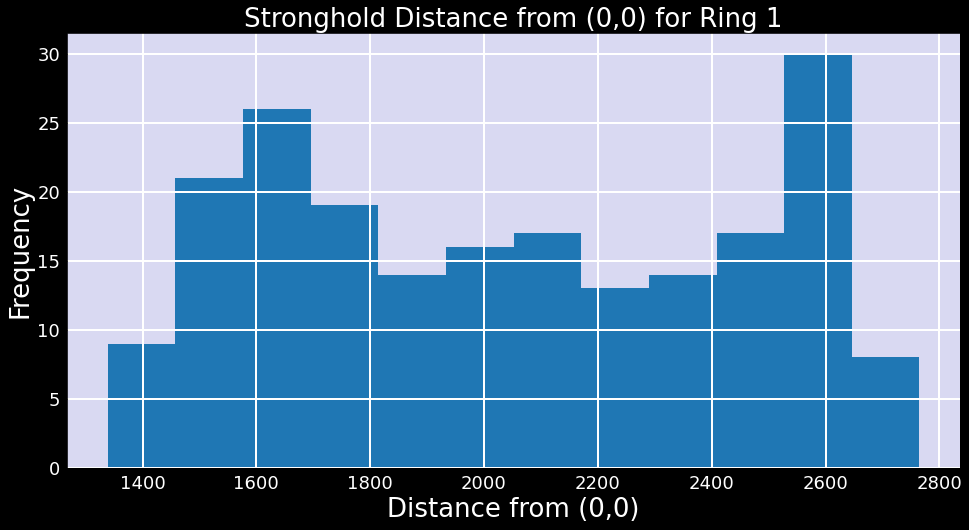

In [50]:
locations = read_stronghold_locations("StrongholdDataFiles\Ring1Locations.txt")
distances = get_distances(locations)
print(stats.describe(distances))

fig = plt.figure(figsize=(16, 8))
ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.95))
plt.hist(distances, bins=12)
plt.grid(color=(1, 1, 1), lw=2)
fig.patch.set_facecolor('black')
plt.xticks(fontsize=18, color=(1,1,1))
plt.yticks(fontsize=18, color=(1,1,1))
plt.xlabel("Distance from (0,0)", color=(1,1,1), fontsize=26)
plt.title("Stronghold Distance from (0,0) for Ring 1", color=(1,1,1), fontsize=26)
plt.ylabel("Frequency", color=(1,1,1), fontsize=26)

plt.show()

#### RIng 7

DescribeResult(nobs=180, minmax=(19811.912426618488, 21217.511305523087), mean=20478.926375193456, variance=146992.28208420216, skewness=0.06717009183061072, kurtosis=-1.1410215558290924)


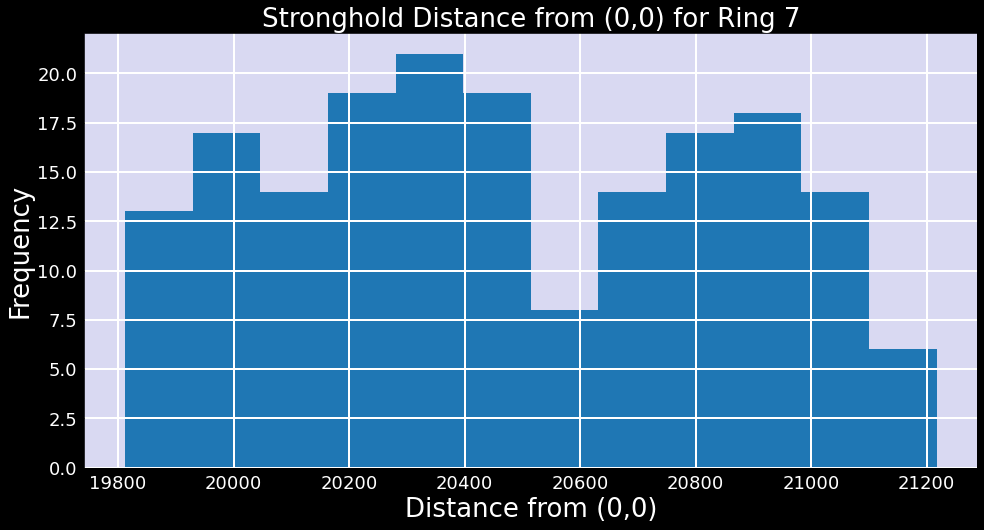

In [54]:
locations = read_stronghold_locations("StrongholdDataFiles\Ring7Locations.txt")
distances = get_distances(locations)
print(stats.describe(distances))

fig = plt.figure(figsize=(16, 8))
ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.95))
plt.hist(distances, bins=12)
plt.grid(color=(1, 1, 1), lw=2)
fig.patch.set_facecolor('black')
plt.xticks(fontsize=18, color=(1,1,1))
plt.yticks(fontsize=18, color=(1,1,1))
plt.xlabel("Distance from (0,0)", color=(1,1,1), fontsize=26)
plt.title("Stronghold Distance from (0,0) for Ring 7", color=(1,1,1), fontsize=26)
plt.ylabel("Frequency", color=(1,1,1), fontsize=26)

plt.show()

##### Calculate where to dig down
We will assume you dig down at (1500, 0), and then go clockwise.

In [38]:
def get_dig_location(theta, r, d):
    x = int(r*math.cos(theta))
    y = int(r*math.sin(theta))
    return (x, y)

def get_dig_locations(theta_0, r, d, num_strongholds, pass_number):
    clockwise = (pass_number % 2 == 0)
    dig_locations = []
    delta_theta = math.acos(1 - d*d / (r*r)) # law of cosines
    theta = theta_0
    
    while theta < 2*math.pi/num_strongholds:
        dig_locations.append(get_dig_location(theta, r, d))
        theta = theta + delta_theta
    
    dig_locations.append(get_dig_location(theta, r, d))
    return dig_locations

def print_all_dig_locations(ring_num, num_passes=3, d=100):
    pass_number = 1
    base_r = ring_radius(ring_num) - 548
    theta_0 = 0
    while pass_number <= num_passes:
        r = base_r + d*(pass_number - 1)
        dig_locations = get_dig_locations(theta_0, r, d, triangular_number(ring_num + 1), pass_number)
        if pass_number % 2 == 0:
            dig_locations.reverse()
        print("Pass {}: Dig in {} locations".format(pass_number, len(dig_locations)))
        convert_dig_locations_to_string(dig_locations)
        pass_number += 1

def convert_dig_locations_to_string(dig_locations):
    LOCS_PER_LINE = 8
    s = ""
    locs = 0
    for loc in dig_locations:
        s += str(loc) + "   "
        locs += 1
        if locs == LOCS_PER_LINE:
            print(s)
            s = ""
            locs = 0
    if s == "":
        print(s)
    else:
        print(s + "\n")
    return

#### Ring 1

In [39]:
print_all_dig_locations(1, num_passes=12, d=100)

Pass 1: Dig in 24 locations
(1500, 0)   (1493, 141)   (1473, 281)   (1440, 418)   (1394, 552)   (1336, 681)   (1266, 804)   (1184, 919)   
(1092, 1027)   (991, 1125)   (880, 1214)   (762, 1291)   (637, 1357)   (506, 1411)   (371, 1453)   (233, 1481)   
(92, 1497)   (-48, 1499)   (-189, 1487)   (-329, 1463)   (-465, 1425)   (-597, 1375)   (-724, 1313)   (-845, 1239)   

Pass 2: Dig in 25 locations
(-837, 1363)   (-714, 1431)   (-585, 1489)   (-451, 1535)   (-314, 1568)   (-174, 1590)   (-33, 1599)   (108, 1596)   
(248, 1580)   (387, 1552)   (522, 1512)   (654, 1460)   (780, 1396)   (901, 1322)   (1014, 1237)   (1119, 1143)   
(1216, 1039)   (1303, 928)   (1380, 809)   (1446, 684)   (1500, 554)   (1544, 419)   (1575, 281)   (1593, 141)   
(1600, 0)   

Pass 3: Dig in 27 locations
(1700, 0)   (1694, 141)   (1676, 281)   (1647, 419)   (1606, 555)   (1554, 687)   (1492, 813)   (1419, 935)   
(1337, 1049)   (1245, 1157)   (1144, 1256)   (1036, 1347)   (920, 1429)   (798, 1500)   (671, 1561)

#### Ring 7

In [37]:
print_all_dig_locations(7, num_passes=12, d=100)

Pass 1: Dig in 25 locations
(19932, 0)   (19931, 141)   (19929, 282)   (19927, 424)   (19923, 565)   (19919, 706)   (19913, 848)   (19907, 989)   
(19899, 1130)   (19891, 1271)   (19881, 1413)   (19871, 1554)   (19859, 1695)   (19847, 1835)   (19833, 1976)   (19819, 2117)   
(19803, 2257)   (19787, 2398)   (19769, 2538)   (19751, 2678)   (19731, 2818)   (19711, 2958)   (19689, 3098)   (19667, 3238)   
(19643, 3377)   

Pass 2: Dig in 25 locations
(19745, 3377)   (19768, 3238)   (19790, 3098)   (19812, 2958)   (19832, 2819)   (19852, 2678)   (19870, 2538)   (19887, 2398)   
(19904, 2257)   (19919, 2117)   (19934, 1976)   (19947, 1835)   (19960, 1695)   (19971, 1554)   (19982, 1413)   (19991, 1271)   
(20000, 1130)   (20007, 989)   (20014, 848)   (20019, 706)   (20024, 565)   (20027, 424)   (20030, 282)   (20031, 141)   
(20032, 0)   

Pass 3: Dig in 25 locations
(20132, 0)   (20131, 141)   (20130, 282)   (20127, 424)   (20124, 565)   (20119, 706)   (20114, 848)   (20107, 989)   
(20100,